# ressources

* https://medium.com/@mariano.scandizzo/strategic-asset-allocation-with-python-c9afef392e90
* https://github.com/mscandizzo/PortfolioTheory/blob/master/Portfolio.ipynb
* https://github.com/scubamut/SIT-Python/blob/master/Strategies/Compare_AA_Strategies.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from optimizer import Optimizer
plt.style.use('ggplot')

In [21]:
df = pd.read_excel('./Data_QAM2.xlsx',sheet_name='Prices')
df.index = df['Dates']
del df['Dates']

# à faire plus propre pour le cours
df_insample = df[df.index <= pd.to_datetime('2010-11-30')]
df_outsample = df[df.index > pd.to_datetime('2010-11-30')]
df_insample.head(10)

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
Dates,,,,,,,
2000-10-31,1282.14,101.57,348.778,390.235,265.15,171.0312,74.2191
2000-11-30,1203.05,103.39,353.744,378.009,270.45,200.4858,74.2632
2000-12-29,1221.25,104.76,360.663,386.206,272.25,212.1430,74.5400
2001-01-31,1244.22,105.98,370.170,409.237,265.85,199.2194,75.9267
2001-02-28,1137.88,107.03,373.802,415.700,267.15,196.6439,73.2996
2001-03-30,1061.26,107.74,376.700,410.200,257.95,193.3921,68.9111
2001-04-30,1138.09,107.01,374.727,405.719,264.05,209.1450,70.9887
2001-05-31,1121.09,107.57,378.556,413.527,265.85,200.8408,69.8542
2001-06-29,1084.79,108.18,380.266,404.998,270.85,176.5319,65.5896


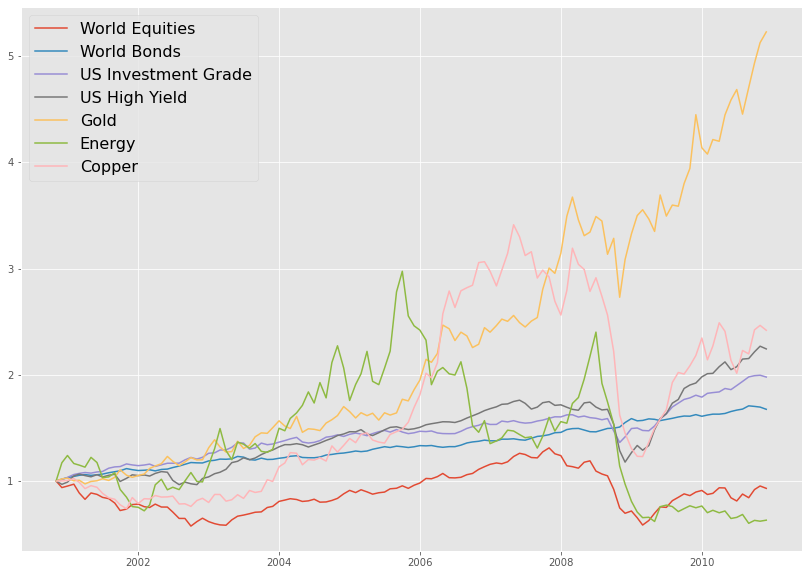

In [3]:
normalized_series = (df_insample/df_insample.iloc[0])
fig2 =plt.figure(figsize=(14,10))

plt.plot(normalized_series)
plt.legend(normalized_series.columns,fontsize = 16)

In [4]:
#monthly data
numb_month = 12
datos_returns = np.log(df_insample/df_insample.shift(1))
datos_returns.dropna(inplace=True)
stats = pd.DataFrame()
rf = 0
stats['Annualized Returns(%)'] =datos_returns.mean() * numb_month *100
stats['Annualized Volatility(%)'] = datos_returns.std() * np.sqrt(numb_month)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] - rf /stats['Annualized Volatility(%)']
print(82*'-')
print('Assets Classes Annualized Statistics — full observation period')
stats.style.bar(color=['red','green'], align='zero')

----------------------------------------------------------------------------------
Assets Classes Annualized Statistics — full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
World Equities,-0.709985,17.342749,-0.709985
World Bonds,5.117266,2.918137,5.117266
US Investment Grade,6.768762,6.252700,6.768762
US High Yield,8.014439,11.287167,8.014439
Gold,16.403776,16.590688,16.403776
Energy,-4.559439,33.388094,-4.559439
Copper,8.761057,24.342358,8.761057


Text(0.5, 1.0, 'Copper')

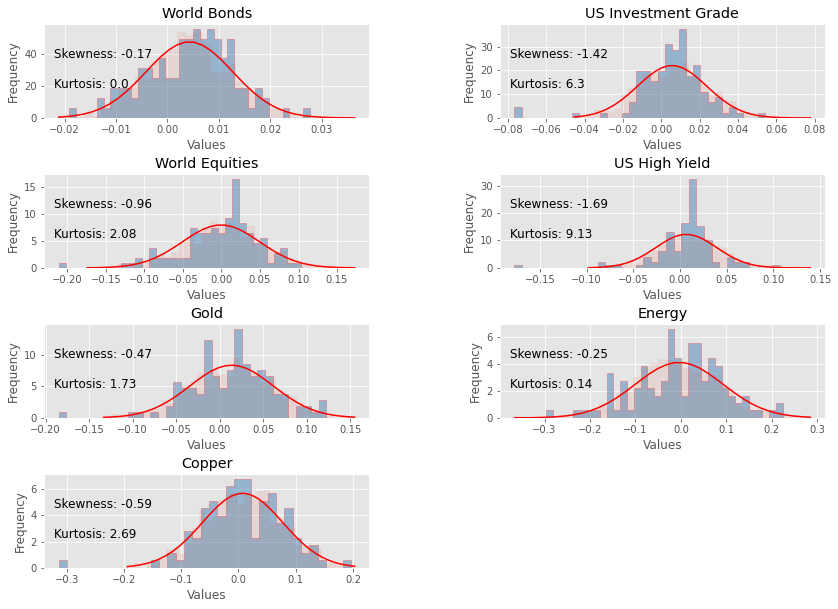

In [5]:
binsnumber = 35

fig3, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.6,wspace=.4) # it adds space in between plots
plt.subplot(423)
ax = plt.gca()

ax.hist(datos_returns['World Equities'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['World Equities'].std(),datos_returns['World Equities'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['World Equities'].skew(),2),round(datos_returns['World Equities'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('World Equities')

plt.subplot(421)
ax1 = plt.gca()
ax1.hist(datos_returns['World Bonds'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['World Bonds'].std(),datos_returns['World Bonds'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['World Bonds'].skew(),2),round(datos_returns['World Bonds'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('World Bonds')

plt.subplot(422)
ax = plt.gca()
ax.hist(datos_returns['US Investment Grade'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['US Investment Grade'].std(),datos_returns['US Investment Grade'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['US Investment Grade'].skew(),2),round(datos_returns['US Investment Grade'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('US Investment Grade')

plt.subplot(424)
ax = plt.gca()
ax.hist(datos_returns['US High Yield'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['US High Yield'].std(),datos_returns['US High Yield'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['US High Yield'].skew(),2),round(datos_returns['US High Yield'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('US High Yield')


plt.subplot(425)
ax = plt.gca()
ax.hist(datos_returns['Gold'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['Gold'].std(),datos_returns['Gold'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['Gold'].skew(),2),round(datos_returns['Gold'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Gold')

plt.subplot(426)
ax = plt.gca()
ax.hist(datos_returns['Energy'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['Energy'].std(),datos_returns['Energy'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['Energy'].skew(),2),round(datos_returns['Energy'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Energy')

plt.subplot(427)
ax = plt.gca()
ax.hist(datos_returns['Copper'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['Copper'].std(),datos_returns['Copper'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['Copper'].skew(),2),round(datos_returns['Copper'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Copper')



US High Yield
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.02975018535062947
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2
Gold
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15633006860686421
            Iterations: 5
            Function evaluations: 31
            Gradient evaluations: 5
Energy
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.40033636607042755
            Iterations: 12
            Function evaluations: 52
            Gradient evaluations: 12
Copper
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.120369140047795
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2
World Equities
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.432112720137378
        

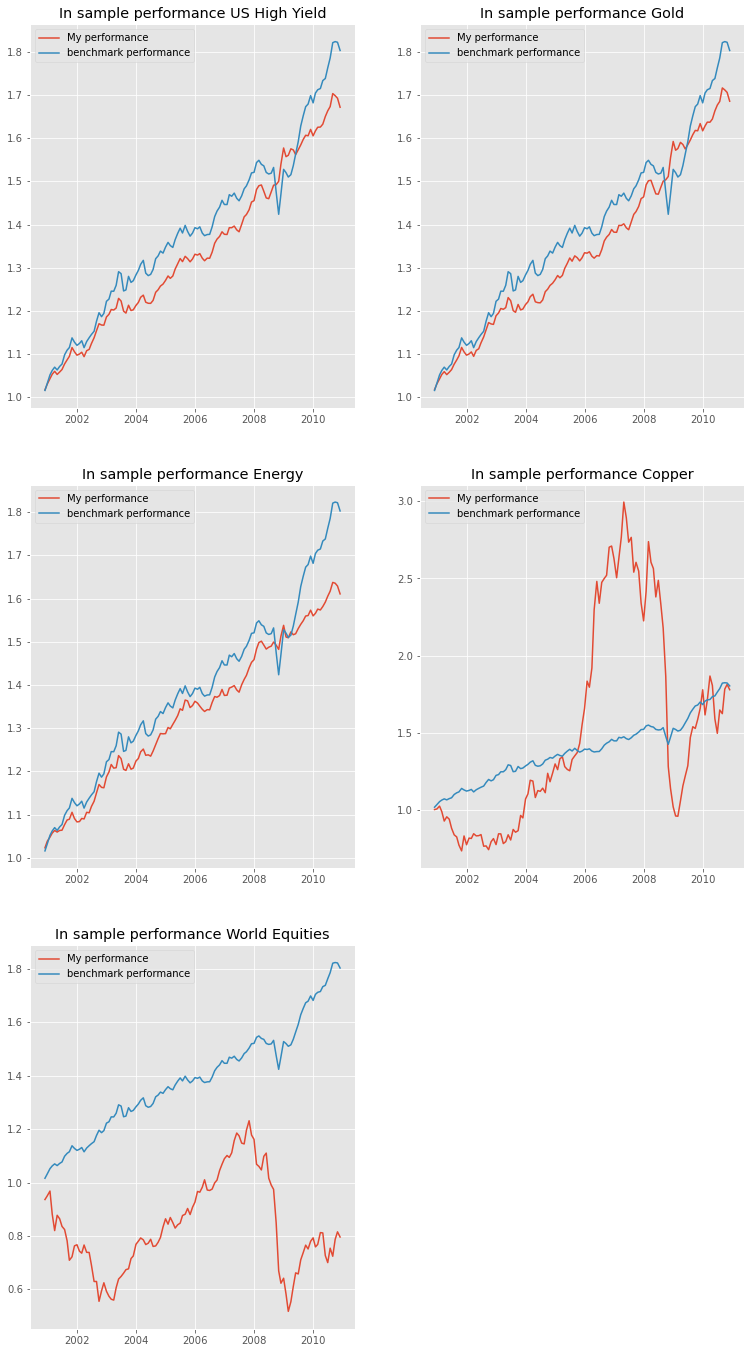

In [6]:
i = 1
plt.figure(figsize=[6.4*2, 4.8*5])
columns = [x for x in df_insample.iloc[:,3:].columns]
columns += ["World Equities"]

dic_weight = {}
for column in columns:
    print(column)
    return_insample = (np.log(df_insample[["World Bonds","US Investment Grade",column]])-np.log     (df_insample[["World Bonds","US Investment Grade",column]].shift(1))).dropna()
    return_outsample = (np.log(df_outsample[["World Bonds","US Investment Grade",column]])-np.log(df_outsample[["World Bonds","US Investment Grade",column]].shift(1))).dropna()

    #print(return_insample)
    opt = Optimizer(return_insample,return_insample.shape[1],opt='SK')

    dic_weight[column] = opt.x
    pnl = np.cumprod(1+(return_insample.dot(opt.x)))
    ben_perf = np.cumprod(1+(return_insample.dot([0.5,0.5,0])))
    plt.subplot(3,2,i)
    plt.plot(pnl)
    plt.plot(ben_perf)
    plt.legend(['My performance','benchmark performance'])
    plt.title(f'In sample performance {column}')
    i+=1

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.49250410727631233
            Iterations: 15
            Function evaluations: 126
            Gradient evaluations: 15


Text(0.5, 1.0, 'In sample performance')

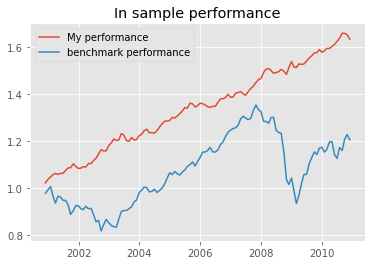

In [22]:
return_insample_all = (np.log(df_insample)-np.log(df_insample.shift(1))).dropna()
opt = Optimizer(return_insample_all,return_insample_all.shape[1],opt='SK')

pnl = np.cumprod(1+(return_insample_all.dot(opt.x)))
ben_perf = np.cumprod(1+(return_insample_all.dot([0.5,0.5,0,0,0,0,0])))

plt.plot(pnl)
plt.plot(ben_perf)
plt.legend(['My performance','benchmark performance'])
plt.title(f'In sample performance')

In [14]:
opt.x[2]

0.009999999999902778

In [15]:
def hit_ratio(return_dataset):
    return len(return_dataset[return_dataset > 0]) / len(return_dataset)

def maxdrawdown(return_dataset):
    pass

Text(0.5, 1.0, 'In sample performance')

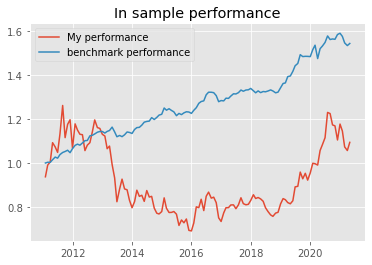

In [9]:
return_outsample_all = (np.log(df_outsample)-np.log(df_outsample.shift(1))).dropna()
pnl = np.cumprod(1+(return_outsample_all.dot(opt.x)))
ben_perf = np.cumprod(1+(return_outsample_all.dot([0,0.5,0.5,0,0,0,0])))

plt.plot(pnl)
plt.plot(ben_perf)
plt.legend(['My performance','benchmark performance'])
plt.title(f'In sample performance')

In [18]:
print(f"Hit ration for out sample perf: {hit_ratio(return_outsample_all.dot(opt.x))}")

Hit ration for out sample perf:0.6209677419354839


In [20]:
total_return = return_outsample_all.dot(opt.x).cumsum()
drawdown = total_return - total_return.cummax()
maxdd = drawdown.min()
maxdd

-0.027972911921132992

In [10]:
df_weight = pd.DataFrame(dic_weight,index=["World Bonds","US Investment","asset colu"])
df_weight

,US High Yield,Gold,Energy,Copper,World Equities
World Bonds,0.99,9.900001e-01,0.940563,2.988929e-15,3.329802e-14
US Investment,0.00,5.966604e-12,0.021068,2.268186e-13,1.215694e-13
asset colu,0.01,9.999940e-03,0.038370,1.000000e+00,1.000000e+00


In [23]:
pnl = np.cumprod(1+(return_outsample.dot(opt.x)))
ben_perf = np.cumprod(1+(return_outsample.dot([0.5,0.5,0])))
plt.plot(pnl)
plt.plot(ben_perf)
plt.legend(['My performance','benchmark performance'])
plt.title('Out sample performance')

ValueError: Dot product shape mismatch, (124, 3) vs (7,)

In [67]:
df_return = (np.log(df) - np.log(df.shift(1))).dropna()
hit_ratio = df_return[df_return > 0]

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
Dates,,,,,,,
2000-11-30,-0.063671,0.017760,0.014138,-0.031831,0.019792,0.158897,0.000594
2000-12-29,0.015015,0.013164,0.019371,0.021453,0.006634,0.056517,0.003720
2001-01-31,0.018634,0.011578,0.026018,0.057924,-0.023789,-0.062854,0.018433
2001-02-28,-0.089342,0.009859,0.009764,0.015669,0.004878,-0.013012,-0.035213
2001-03-30,-0.069710,0.006612,0.007723,-0.013319,-0.035045,-0.016675,-0.061738
...,...,...,...,...,...,...,...
2020-12-31,0.040550,0.002395,0.004901,0.018945,0.066092,-0.006711,0.003044
2021-01-29,-0.010595,-0.005877,-0.012274,0.003162,-0.027076,0.053196,0.000129
2021-02-26,0.024208,-0.017718,-0.019749,0.003336,-0.063461,0.143165,0.096523


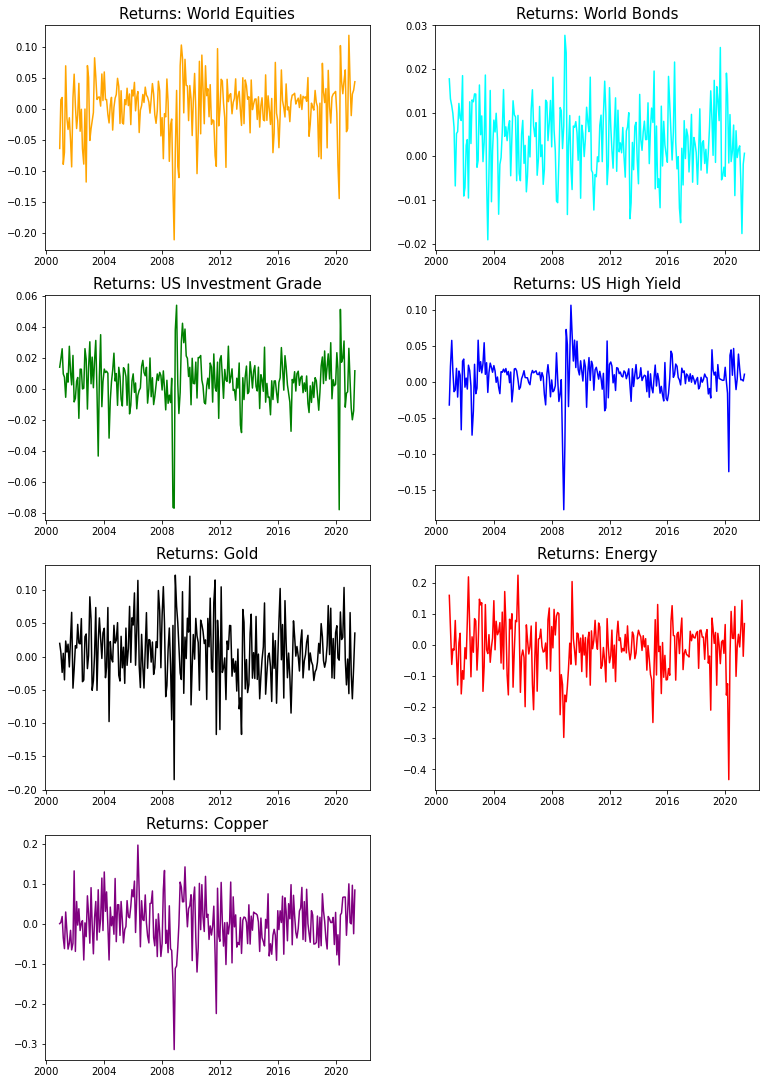

In [15]:
plt.figure(figsize=[6.4*2, 4.8*5])
colors = ['orange', 'cyan', 'green','blue','black','red','purple']
for i in range(df_return.shape[1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_return.index, df_return[df_return.columns[i]].values,c=colors[i])
    plt.title(f'Returns: {df_return.columns[i]}',fontdict={'size':15})

Text(0.5, 1.0, 'Returns of benchmark')

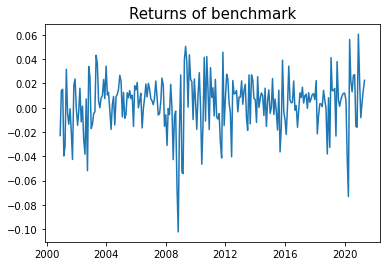

In [19]:
benchmark = (0.5*df_return['World Equities'] + 0.5*df_return['World Bonds'])
plt.plot(benchmark.index,benchmark.values)
plt.title(f'Returns of benchmark',fontdict={'size':15})
#benchmark.plot()

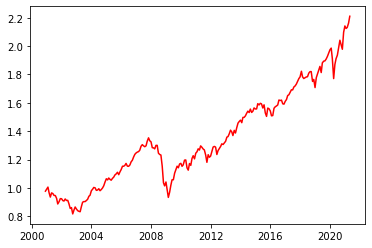

In [42]:
pnl = np.cumprod(1+benchmark.values)
plt.plot(benchmark.index,pnl,c='red')

In [30]:
df_insample = df_return[df_return.index <= pd.to_datetime("2010-11-30")]
df_outsample = df_return[df_return.index > pd.to_datetime("2010-11-30")]
df_outsample

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
Dates,,,,,,,
2010-12-31,0.069974,-0.004181,-0.009528,0.017030,0.025054,0.078672,0.118724
2011-01-31,0.021646,-0.004673,0.002367,0.020541,-0.064450,0.010435,0.016593
2011-02-28,0.032766,-0.000119,0.007060,0.013156,0.057341,-0.014012,0.024040
2011-03-31,-0.012447,-0.001246,0.000275,0.004082,0.014679,0.070172,-0.038792
2011-04-29,0.039432,0.007099,0.016838,0.014934,0.087843,0.057230,-0.005110
...,...,...,...,...,...,...,...
2020-12-31,0.040550,0.002395,0.004901,0.018945,0.066092,-0.006711,0.003044
2021-01-29,-0.010595,-0.005877,-0.012274,0.003162,-0.027076,0.053196,0.000129
2021-02-26,0.024208,-0.017718,-0.019749,0.003336,-0.063461,0.143165,0.096523


# The SAA

In [31]:
df_insample.describe()

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,-0.000592,0.004264,0.005641,0.006679,0.013670,-0.003800,0.007301
std,0.050064,0.008424,0.018050,0.032583,0.047893,0.096383,0.070270
min,-0.211271,-0.019150,-0.076682,-0.177376,-0.185000,-0.297197,-0.313855
25%,-0.023737,-0.001225,-0.003846,-0.007084,-0.016563,-0.064071,-0.040384
50%,0.006707,0.005209,0.007370,0.010947,0.018983,-0.004461,0.003720
75%,0.029626,0.009505,0.014077,0.020176,0.046774,0.064136,0.055911
max,0.103493,0.027748,0.054048,0.106781,0.122339,0.223734,0.196809


# The TAA

In [121]:
df_carry = pd.read_excel("./Data_QAM2.xlsx",sheet_name='Carry')
df_carry.index = df_carry['Unnamed: 0']
df_carry.index.name = 'date'
del df_carry['Unnamed: 0']
df_carry_insample = df_carry[df_carry.index <= pd.to_datetime("2010-12-31")]
df_carry_insample

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
date,,,,,,,
2000-10-31,3.9203,4.257575,7.818,13.328,0.439334,4.369265,1.597518
2000-11-30,4.1746,4.058779,7.619,14.195,0.439895,4.558229,1.564340
2000-12-29,3.9931,3.924361,7.324,13.920,0.441495,4.109432,1.549395
2001-01-31,4.0870,3.767103,6.894,12.547,0.399213,4.682189,1.566139
2001-02-28,4.4596,3.628153,6.783,12.204,0.398146,4.237691,1.482628
...,...,...,...,...,...,...,...
2010-08-31,6.7815,1.671691,3.721,8.342,0.165272,1.239606,0.221287
2010-09-30,6.5967,1.770909,3.627,7.852,0.143070,1.293467,0.231488
2010-10-29,6.3821,1.802829,3.576,7.535,0.145989,1.317731,0.238098


In [122]:
df_carry_insample_Z = (df_carry_insample - np.mean(df_carry_insample))/np.std(df_carry_insample)
df_carry_insample_Z['median'] = df_carry_insample_Z.median(axis=1)
df_carry_insample_Z

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper,median
date,,,,,,,,
2000-10-31,-0.952525,2.222602,2.180076,1.077575,1.042368,0.987774,1.464940,1.077575
2000-11-30,-0.766411,1.878261,1.986735,1.380907,1.046301,1.135786,1.391529,1.380907
2000-12-29,-0.899245,1.645431,1.700124,1.284694,1.057530,0.784251,1.358462,1.284694
2001-01-31,-0.830523,1.373039,1.282352,0.804331,0.760906,1.232882,1.395511,1.232882
2001-02-28,-0.557830,1.132359,1.174509,0.684328,0.753421,0.884715,1.210732,0.884715
...,...,...,...,...,...,...,...,...
2010-08-31,1.141488,-2.256497,-1.800416,-0.666846,-0.880269,-1.463634,-1.580143,-1.463634
2010-09-30,1.006239,-2.084638,-1.891743,-0.838279,-1.036023,-1.421446,-1.557573,-1.421446
2010-10-29,0.849181,-2.029348,-1.941293,-0.949186,-1.015545,-1.402440,-1.542947,-1.402440


In [123]:
df_carry_insample_Z_pos = df_carry_insample_Z.copy()
for value in df_carry_insample_Z.iloc[:,0:7].columns:
    list_value = []
    for i in range(len(df_carry_insample_Z)):
        if df_carry_insample_Z[value][i] > df_carry_insample_Z['median'][i]:
            list_value.append(1)
        else:
            list_value.append(-1)
    df_carry_insample_Z_pos[f'{value}_position'] = list_value
#df_carry_insample_Z_pos.to_csv('Carry_postion.csv')
df_carry_insample_Z_pos

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper,median,World Equities_position,World Bonds_position,US Investment Grade_position,US High Yield_position,Gold_position,Energy_position,Copper_position
date,,,,,,,,,,,,,,,
2000-10-31,-0.952525,2.222602,2.180076,1.077575,1.042368,0.987774,1.464940,1.077575,-1,1,1,-1,-1,-1,1
2000-11-30,-0.766411,1.878261,1.986735,1.380907,1.046301,1.135786,1.391529,1.380907,-1,1,1,-1,-1,-1,1
2000-12-29,-0.899245,1.645431,1.700124,1.284694,1.057530,0.784251,1.358462,1.284694,-1,1,1,-1,-1,-1,1
2001-01-31,-0.830523,1.373039,1.282352,0.804331,0.760906,1.232882,1.395511,1.232882,-1,1,1,-1,-1,-1,1
2001-02-28,-0.557830,1.132359,1.174509,0.684328,0.753421,0.884715,1.210732,0.884715,-1,1,1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,1.141488,-2.256497,-1.800416,-0.666846,-0.880269,-1.463634,-1.580143,-1.463634,1,-1,-1,1,1,-1,-1
2010-09-30,1.006239,-2.084638,-1.891743,-0.838279,-1.036023,-1.421446,-1.557573,-1.421446,1,-1,-1,1,1,-1,-1
2010-10-29,0.849181,-2.029348,-1.941293,-0.949186,-1.015545,-1.402440,-1.542947,-1.402440,1,-1,-1,1,1,-1,-1


In [126]:
position = df_carry_insample_Z_pos.iloc[:,8:]
position[position[position.columns] > 0]

weight_final = {}
for i in range(len(position)):
    num_pos = np.sum(np.array(position.values[i]) > 0)
    num_neg = np.sum(np.array(position.values[i]) < 0)
    array = []
    for j in range(len(position.values[i])):
        #print(position.values[i][j]/num_neg)
        if position.iloc[i,j] > 0:
           position.iloc[i,j] = position.iloc[i,j]/num_pos
        else:
            position.iloc[i,j] = position.iloc[i,j]/num_neg
    #print(array)
    #position.loc[i] = array
    #print(position.values[i])
position.to_csv('value_position.csv')
position

,World Equities_position,World Bonds_position,US Investment Grade_position,US High Yield_position,Gold_position,Energy_position,Copper_position
date,,,,,,,
2000-10-31,-0.250000,0.333333,0.333333,-0.250000,-0.250000,-0.25,0.333333
2000-11-30,-0.250000,0.333333,0.333333,-0.250000,-0.250000,-0.25,0.333333
2000-12-29,-0.250000,0.333333,0.333333,-0.250000,-0.250000,-0.25,0.333333
2001-01-31,-0.250000,0.333333,0.333333,-0.250000,-0.250000,-0.25,0.333333
2001-02-28,-0.250000,0.333333,0.333333,-0.250000,-0.250000,-0.25,0.333333
...,...,...,...,...,...,...,...
2010-08-31,0.333333,-0.250000,-0.250000,0.333333,0.333333,-0.25,-0.250000
2010-09-30,0.333333,-0.250000,-0.250000,0.333333,0.333333,-0.25,-0.250000
2010-10-29,0.333333,-0.250000,-0.250000,0.333333,0.333333,-0.25,-0.250000


In [125]:
df_vix = pd.read_excel("./Data_QAM2.xlsx",sheet_name='VIX')
df_vix.index = df_vix['Dates']
del df_vix['Dates']
df_vix

,VIX
Dates,
2000-10-31,23.63
2000-11-30,29.65
2000-12-29,26.85
2001-01-31,22.02
2001-02-28,28.35
...,...
2020-12-31,22.75
2021-01-29,33.09
2021-02-26,27.95


In [51]:
df_vix_standard = (df_vix-np.mean(df_vix))/np.std(df_vix)
df_vix_standard

,VIX
Dates,
2000-10-31,0.432869
2000-11-30,1.150741
2000-12-29,0.816847
2001-01-31,0.240880
2001-02-28,0.995719
...,...
2020-12-31,0.327931
2021-01-29,1.560953
2021-02-26,0.948020
